Required packages are imported

In [1]:
from openai import OpenAI

import pandas as pd

import os

Api key is initialised

In [49]:
#os.environ["OPENAI_API_KEY"] = ""

client = OpenAI()

In [61]:
MODEL = 'text-embedding-3-small'

# MODEL = 'text-embedding-3-large'

In [62]:
embedding_pie = client.embeddings.create(
    input = 'pie',
    model = MODEL
)

embedding_pie

CreateEmbeddingResponse(data=[Embedding(embedding=[0.020493485033512115, -0.046179886907339096, -0.029329394921660423, -0.004126516170799732, 0.018506398424506187, -0.02622953988611698, -0.015976175665855408, 0.07254189997911453, -0.0033399611711502075, -0.04885582998394966, 0.015512521378695965, -0.005904958583414555, 0.009266446344554424, -0.009080984629690647, 0.007623788435012102, -0.027792714536190033, 0.017751306295394897, -0.025593673810362816, 0.004520621616393328, 0.014201044104993343, 0.024242455139756203, 0.014214291237294674, -0.010001668706536293, 0.006693169474601746, 0.02315618097782135, 0.011856282129883766, 0.011114437133073807, 0.006408353801816702, 0.0070342859253287315, -0.02037425898015499, 0.006474589928984642, -0.036535896360874176, 0.008650449104607105, -0.0681438148021698, 0.007464821450412273, -0.042603131383657455, -0.019539684057235718, 0.005967882927507162, -0.026057327166199684, -0.006203021388500929, -0.01881108433008194, -0.0074913157150149345, -0.012750

In [63]:
embedding_pie = embedding_pie.data[0].embedding

embedding_pie

[0.020493485033512115,
 -0.046179886907339096,
 -0.029329394921660423,
 -0.004126516170799732,
 0.018506398424506187,
 -0.02622953988611698,
 -0.015976175665855408,
 0.07254189997911453,
 -0.0033399611711502075,
 -0.04885582998394966,
 0.015512521378695965,
 -0.005904958583414555,
 0.009266446344554424,
 -0.009080984629690647,
 0.007623788435012102,
 -0.027792714536190033,
 0.017751306295394897,
 -0.025593673810362816,
 0.004520621616393328,
 0.014201044104993343,
 0.024242455139756203,
 0.014214291237294674,
 -0.010001668706536293,
 0.006693169474601746,
 0.02315618097782135,
 0.011856282129883766,
 0.011114437133073807,
 0.006408353801816702,
 0.0070342859253287315,
 -0.02037425898015499,
 0.006474589928984642,
 -0.036535896360874176,
 0.008650449104607105,
 -0.0681438148021698,
 0.007464821450412273,
 -0.042603131383657455,
 -0.019539684057235718,
 0.005967882927507162,
 -0.026057327166199684,
 -0.006203021388500929,
 -0.01881108433008194,
 -0.0074913157150149345,
 -0.01275047101080

In [64]:
len(embedding_pie)

1536

In [65]:
embedding_cake = client.embeddings.create(
    input = 'cake',
    model = MODEL
)

embedding_cake = embedding_cake.data[0].embedding

In [66]:
import numpy as np
from numpy.linalg import norm

def cosine_similarity(embeddings_a, embeddings_b):
    cosine_sim = np.dot(embeddings_a, embeddings_b) / \
        (norm(embeddings_a) * norm(embeddings_b))

    return cosine_sim

In [67]:
cosine_similarity(embedding_pie, embedding_cake)

np.float64(0.4665465442634169)

Now we are creating embedding for Onion and garlic and it is clear that onion and garlic are similar but scores between Tea and Onion are lesser.

In [68]:
embedding_scarf = client.embeddings.create(
    input = 'scarf',
    model = MODEL
)

embedding_scarf = embedding_scarf.data[0].embedding

In [69]:
embedding_shawl = client.embeddings.create(
    input = 'shawl',
    model = MODEL
)

embedding_shawl = embedding_shawl.data[0].embedding

In [70]:
cosine_similarity(embedding_scarf, embedding_shawl)

np.float64(0.6100961350317624)

In [71]:
cosine_similarity(embedding_scarf, embedding_pie)

np.float64(0.32911046820123974)

In [72]:
def get_embedding(text):
    response = client.embeddings.create(
        input = text,
        model = MODEL
    )

    return response.data[0].embedding

Generating embeddings for all items in dataset using apply function

In [73]:
words_df = pd.read_csv('dataset/random_words.csv')

print(words_df)

         Words
0           AI
1          hat
2          red
3        brown
4        robot
5       carrot
6       island
7       garlic
8       canyon
9        steak
10    cucumber
11       onion
12     thunder
13      yellow
14       dress
15       jeans
16       tacos
17      burger
18       snowy
19       black
20      sensor
21       drone
22      stormy
23       salad
24    mountain
25     lettuce
26      forest
27       curry
28      jacket
29        coat
30       windy
31       shirt
32      desert
33       white
34    sneakers
35      pepper
36  smartphone
37     volcano
38        chip
39       sunny
40   satellite
41       foggy
42     spinach
43        hail
44       river
45       green
46      potato
47      orange
48       sushi
49      purple


In [83]:
words_df['embedding'] = words_df['Words'].apply(lambda x: get_embedding(x))

words_df.sample(5)

,Words,embedding
21,drone,"[0.016920706257224083, -0.0026762676425278187,..."
0,AI,"[-0.00817601103335619, -0.024666832759976387, ..."
40,satellite,"[0.011332190595567226, -0.01888275519013405, 0..."
14,dress,"[0.02224951796233654, 0.026061873883008957, -0..."
46,potato,"[-0.028113599866628647, -0.06587958335876465, ..."


We are saving generated embeddings for future use so that we dont have to generate every time

In [84]:
words_df.to_csv('words_embeddings.csv', index = False)

Search terms:

- white
- cold
- fries
- japan

In [113]:
search_term = input('Enter a search term: ')

Enter a search term: onion


In [114]:
search_term_vector = get_embedding(search_term)

search_term_vector

[-0.014513884671032429,
 -0.03640483692288399,
 -0.02745908312499523,
 -0.008882158435881138,
 0.008656041696667671,
 -0.047880273312330246,
 0.03552863374352455,
 0.029140828177332878,
 -0.020675573498010635,
 0.01005514059215784,
 0.0542963445186615,
 0.005373811814934015,
 0.000744154560379684,
 -0.0189090333878994,
 -0.011305849999189377,
 0.02784065529704094,
 -0.022442111745476723,
 0.008323932066559792,
 -0.050565414130687714,
 0.010083405300974846,
 0.007278141099959612,
 0.01694464311003685,
 0.039203036576509476,
 0.0024484230671077967,
 0.03824203833937645,
 0.010154066607356071,
 0.00995621457695961,
 0.050876323133707047,
 0.047597628086805344,
 -0.03575475141406059,
 -0.009426251985132694,
 -0.044855959713459015,
 0.00245725573040545,
 0.03086497075855732,
 -0.007023759186267853,
 -0.0070343585684895515,
 0.05183732137084007,
 -0.05896000936627388,
 0.04573216289281845,
 0.040277089923620224,
 -0.011842877604067326,
 -0.00919306930154562,
 0.02587626501917839,
 -0.0180610

In [115]:
words_df['similarities'] = words_df['embedding'].apply(
    lambda x: cosine_similarity(x, search_term_vector))

words_df

,Words,embedding,similarities
0,AI,"[-0.00817601103335619, -0.024666832759976387, ...",0.208724
1,hat,"[-0.012111276388168335, 0.0015233769081532955,...",0.247276
2,red,"[-0.022114494815468788, -0.010901302099227905,...",0.269504
3,brown,"[-0.030717208981513977, -0.007124793250113726,...",0.256544
4,robot,"[0.018738731741905212, -0.0022799279540777206,...",0.252133
5,carrot,"[0.003843679092824459, -0.024174438789486885, ...",0.509089
6,island,"[0.0034959830809384584, -0.01871379278600216, ...",0.296509
7,garlic,"[-0.026648040860891342, -0.01744099333882332, ...",0.549192
8,canyon,"[0.004481151700019836, -0.023176155984401703, ...",0.285727
9,steak,"[-0.016162695363163948, -0.03319265693426132, ...",0.331624


In [116]:
words_df.sort_values('similarities', ascending = False).head(20)

,Words,embedding,similarities
11,onion,"[-0.014513884671032429, -0.03640483692288399, ...",1.000000
7,garlic,"[-0.026648040860891342, -0.01744099333882332, ...",0.549192
5,carrot,"[0.003843679092824459, -0.024174438789486885, ...",0.509089
10,cucumber,"[-0.003468140959739685, -0.01695959083735943, ...",0.484294
46,potato,"[-0.028113599866628647, -0.06587958335876465, ...",0.455207
35,pepper,"[0.00644842442125082, -0.045281004160642624, -...",0.449422
25,lettuce,"[-0.02547581121325493, -0.03630539029836655, 0...",0.402409
47,orange,"[-0.025900742039084435, -0.005591441877186298,...",0.397311
42,spinach,"[-0.02449207566678524, -0.024917911738157272, ...",0.386520
23,salad,"[-0.0006578968022949994, -0.03706714138388634,...",0.380369


Stacking all the word embeddings to create a Matrix

In [117]:
import numpy as np

emb_matrix = np.vstack(words_df.embedding.values)

emb_matrix.shape

(50, 1536)

In [118]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 10.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 7.8 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip available: 22.3.1 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [120]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42, n_init = 1)

kmeans.fit(emb_matrix)

labels = kmeans.labels_

words_df['Cluster'] = labels

words_df

,Words,embedding,similarities,Cluster
0,AI,"[-0.00817601103335619, -0.024666832759976387, ...",0.208724,3
1,hat,"[-0.012111276388168335, 0.0015233769081532955,...",0.247276,1
2,red,"[-0.022114494815468788, -0.010901302099227905,...",0.269504,3
3,brown,"[-0.030717208981513977, -0.007124793250113726,...",0.256544,0
4,robot,"[0.018738731741905212, -0.0022799279540777206,...",0.252133,3
5,carrot,"[0.003843679092824459, -0.024174438789486885, ...",0.509089,2
6,island,"[0.0034959830809384584, -0.01871379278600216, ...",0.296509,3
7,garlic,"[-0.026648040860891342, -0.01744099333882332, ...",0.549192,2
8,canyon,"[0.004481151700019836, -0.023176155984401703, ...",0.285727,3
9,steak,"[-0.016162695363163948, -0.03319265693426132, ...",0.331624,4


The size of the embeddings varies with the complexity of the underlying model. In order to visualize this high dimensional data we use the t-SNE algorithm to transform the data into two dimensions.Items like Tea, Coffee, Water are closer to each other.All fruits are closer to each other too.

Matplotlib is building the font cache; this may take a moment.


Text(0.5, 1.0, 'Clusters identified visualized in 2D using t-SNE')

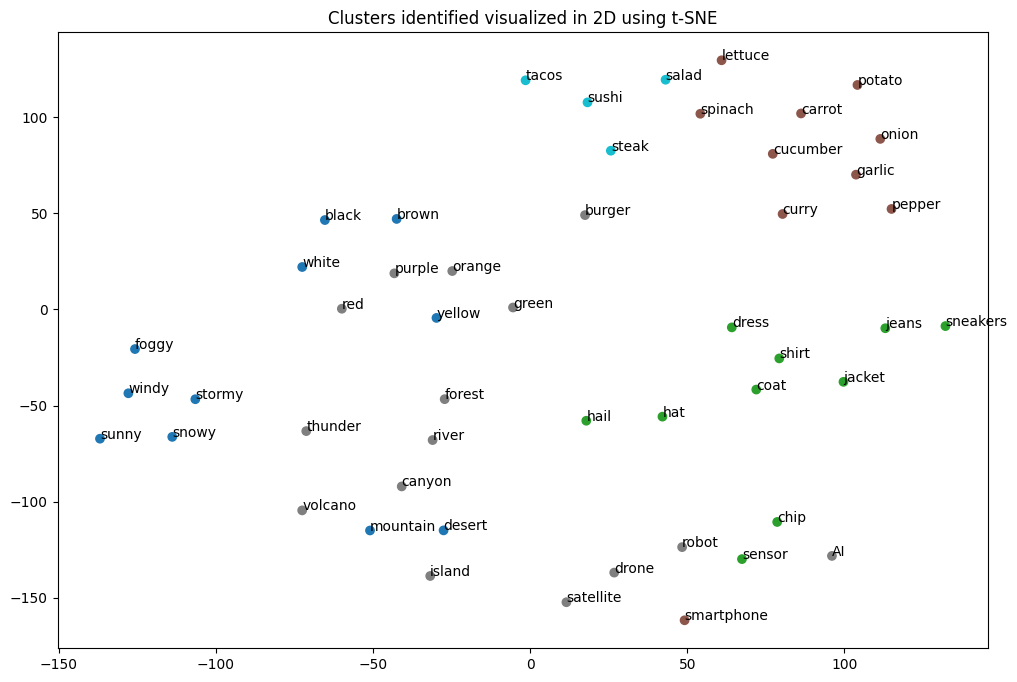

In [121]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

labels = kmeans.fit_predict(emb_matrix)

tsne = TSNE(n_components = 2, perplexity = 15, random_state = 42, init = 'random', learning_rate = 200)

vis_dims2 = tsne.fit_transform(emb_matrix)

plt.figure(figsize = (12, 8))

plt.scatter(vis_dims2[:, 0], vis_dims2[:, 1], c = labels, cmap = 'tab10')

for i, t in enumerate(words_df.Words.values):
    plt.annotate(t,(vis_dims2[:, 0][i],vis_dims2[:, 1][i]))

plt.title('Clusters identified visualized in 2D using t-SNE')